Course 7 Week 2
Activity 1
Coronavirus disease 2019 (COVID-19) is an infectious disease caused by
severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The disease
was first identified in 2019 in Wuhan, China, and has since spread globally,
resulting in the 2019–20 coronavirus pandemic. Common symptoms include
fever, cough and shortness of breath. Muscle pain, sputum production and
sore throat are less common. The rate of deaths per number of diagnosed
cases is on average 3.4%, ranging from 0.2% in those less than 20 to
approximately 15% in those over 80 years old.
Data Source (Date wise) : 2019 Novel Coronavirus COVID-19 (2019-nCoV)
Data Repository by Johns Hopkins CSSE
Data
Field description
● Province/State: China - province name; US/Canada/Australia/ - city name,
state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship);
other countries - blank.
● Country/Region: country/region name conforming to WHO (will be updated).
● Last Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).
● Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8),
we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases
only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis
standard might be changed since Feb 27 to "slow the growth of new case numbers."
(Source)
● Deaths: the number of deaths.
● Recovered: the number of recovered cases.
The dataset is attached as a separate file. Please use Google Colab to solve all the questions below:

In [15]:
#Write a Python program to display first 5 rows from COVID-19 dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Corona2.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3268 non-null   float64
 1   Admin2               3272 non-null   object 
 2   Province_State       3837 non-null   object 
 3   Country_Region       4016 non-null   object 
 4   Last_Update          4016 non-null   object 
 5   Lat                  3925 non-null   float64
 6   Long_                3925 non-null   float64
 7   Confirmed            4016 non-null   int64  
 8   Deaths               4016 non-null   int64  
 9   Recovered            4016 non-null   int64  
 10  Active               0 non-null      float64
 11  Combined_Key         4016 non-null   object 
 12  Incident_Rate        3922 non-null   float64
 13  Case_Fatality_Ratio  3974 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 439.4+ KB


In [16]:
#print the dataset information and check the missing values.
print(df.describe(include='all'))
print(df.isnull().sum())

                FIPS      Admin2 Province_State Country_Region  \
count    3268.000000        3272           3837           4016   
unique           NaN        1927            598            201   
top              NaN  Unassigned          Texas             US   
freq             NaN          51            255           3279   
mean    32405.943390         NaN            NaN            NaN   
std     18056.381177         NaN            NaN            NaN   
min        60.000000         NaN            NaN            NaN   
25%     19048.500000         NaN            NaN            NaN   
50%     30068.000000         NaN            NaN            NaN   
75%     47041.500000         NaN            NaN            NaN   
max     99999.000000         NaN            NaN            NaN   

            Last_Update          Lat        Long_     Confirmed  \
count              4016  3925.000000  3925.000000  4.016000e+03   
unique                9          NaN          NaN           NaN   
top   

In [17]:

# Replace missing values in the 'province' column with 'Tobefound'
df['Province_State'].fillna('Tobefound', inplace=True)
print(df.isnull().sum())

FIPS                    748
Admin2                  744
Province_State            0
Country_Region            0
Last_Update               0
Lat                      91
Long_                    91
Confirmed                 0
Deaths                    0
Recovered                 0
Active                 4016
Combined_Key              0
Incident_Rate            94
Case_Fatality_Ratio      42
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_28020\11233151.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Province_State'].fillna('Tobefound', inplace=True)


In [18]:
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,Tobefound,Afghanistan,2023-01-03 4:21,33.939110,67.709953,207627,7849,199778,NaN,Afghanistan,533.356919,3.780337
1,NaN,NaN,Tobefound,Albania,2023-01-03 4:21,41.153300,20.168300,333812,3595,330217,NaN,Albania,11599.555220,1.076953
2,NaN,NaN,Tobefound,Algeria,2023-01-03 4:21,28.033900,1.659600,271229,6881,264348,NaN,Algeria,618.523486,2.536971
3,NaN,NaN,Tobefound,Andorra,2023-01-03 4:21,42.506300,1.521800,47751,165,47586,NaN,Andorra,61801.591920,0.345543
4,NaN,NaN,Tobefound,Angola,2023-01-03 4:21,-11.202700,17.873900,105095,1930,103165,NaN,Angola,319.765542,1.836434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,NaN,NaN,Tobefound,West Bank and Gaza,2023-01-03 4:21,31.952200,35.233200,703228,5708,697520,NaN,West Bank and Gaza,13784.956960,0.811686
4012,NaN,NaN,Tobefound,Winter Olympics 2022,2023-01-03 4:21,39.904200,116.407400,535,0,535,NaN,Winter Olympics 2022,NaN,0.000000
4013,NaN,NaN,Tobefound,Yemen,2023-01-03 4:21,15.552727,48.516388,11945,2159,9786,NaN,Yemen,40.048994,18.074508
4014,NaN,NaN,Tobefound,Zambia,2023-01-03 4:21,-13.133897,27.849332,334661,4024,330637,NaN,Zambia,1820.397090,1.202411


In [19]:
#Normalize the values for “Confirmed” column as per the z-score.
from scipy.stats import zscore

# Normalize the 'Confirmed' column using Z-score
df['Confirmed_zscore'] = zscore(df['Confirmed'])

print(df[['Confirmed', 'Confirmed_zscore']].head())

   Confirmed  Confirmed_zscore
0     207627          0.041081
1     333812          0.161672
2     271229          0.101863
3      47751         -0.111709
4     105095         -0.056907


In [20]:

#Create bin values for “Death” column in the data set.
min_deaths = df['Deaths'].min()
print(min_deaths)
max_deaths = df['Deaths'].max()
print(max_deaths)
mean_deaths = df['Deaths'].mean()
print(mean_deaths)

df['Deaths_bins'] = pd.qcut(df['Deaths'], q=6, labels=['very low','Low', 'Medium', 'High', 'Very High', 'Extremly high'])

# Display the first few rows to confirm
print(df[['Deaths', 'Deaths_bins']].head())

0
183348
1667.2898406374502
   Deaths    Deaths_bins
0    7849  Extremly high
1    3595  Extremly high
2    6881  Extremly high
3     165           High
4    1930  Extremly high


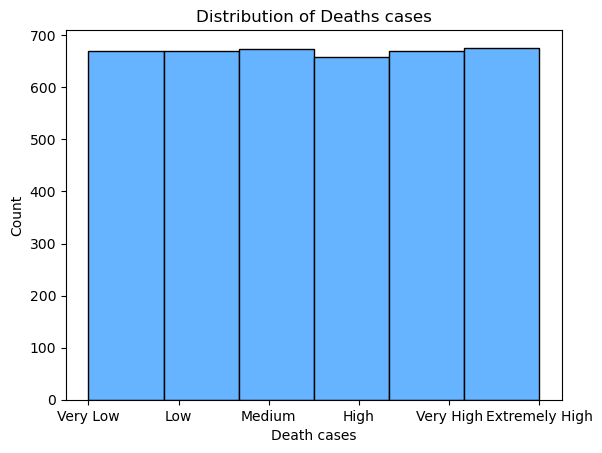

In [21]:
# Plot the histogram for the 'Deaths_bins' column

plt.hist(df['Deaths_bins'], bins=6, color='#66b3ff', edgecolor='black')

# to put the labels in order on the histogram
bin_edges = pd.qcut(df['Deaths'], q=6).unique().categories  # Get bin edges
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extremely High']

# Set the correct x-tick labels to match the bin edges
plt.xticks([i for i in range(6)], labels=bin_labels)


# Set x/y labels and plot title
plt.xlabel("Death cases")
plt.ylabel("Count")
plt.title("Distribution of Deaths cases")

# Display the plot
plt.show()

In [22]:
#Write a Python program to get the maximum number of confirmed, deaths, recovered and active cases of Novel Coronavirus (COVID-19) Country wise.
country_stats = df.groupby('Country_Region').agg({
    'Confirmed': 'max',
    'Deaths': 'max',
    'Recovered': 'max',
    'Active': 'max'
}).reset_index()

# Display the result
print(country_stats)

           Country_Region  Confirmed  Deaths  Recovered  Active
0             Afghanistan     207627    7849     199778     NaN
1                 Albania     333812    3595     330217     NaN
2                 Algeria     271229    6881     264348     NaN
3                 Andorra      47751     165      47586     NaN
4                  Angola     105095    1930     103165     NaN
..                    ...        ...     ...        ...     ...
196    West Bank and Gaza     703228    5708     697520     NaN
197  Winter Olympics 2022        535       0        535     NaN
198                 Yemen      11945    2159       9786     NaN
199                Zambia     334661    4024     330637     NaN
200              Zimbabwe     259981    5637     254344     NaN

[201 rows x 5 columns]


In [23]:
#Write a Python program to get the total number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise
province_stats = df.groupby(['Country_Region', 'Province_State']).agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()

# Display the result
print(province_stats)

           Country_Region Province_State  Confirmed  Deaths  Recovered
0             Afghanistan      Tobefound     207627    7849     199778
1                 Albania      Tobefound     333812    3595     330217
2                 Algeria      Tobefound     271229    6881     264348
3                 Andorra      Tobefound      47751     165      47586
4                  Angola      Tobefound     105095    1930     103165
..                    ...            ...        ...     ...        ...
791    West Bank and Gaza      Tobefound     703228    5708     697520
792  Winter Olympics 2022      Tobefound        535       0        535
793                 Yemen      Tobefound      11945    2159       9786
794                Zambia      Tobefound     334661    4024     330637
795              Zimbabwe      Tobefound     259981    5637     254344

[796 rows x 5 columns]


In [24]:
# Write a Python program to get the country-wise (country name taken as input from user) cases of confirmed, deaths, and recovered cases of Novel Coronavirus (COVID-19).
# Get country name as input from the user
country = input("Enter the country name: ")

# Filter the dataset for the given country and aggregate the values
country_data = df[df['Country_Region'] == country].agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
})

# Display the results
print(f"COVID-19 Data for {country}:")
print(country_data)

Enter the country name:  Yemen


COVID-19 Data for Yemen:
Confirmed    11945
Deaths        2159
Recovered     9786
dtype: int64


In [ ]:
# Write a Python program to get the country-wise death cases of Novel Coronavirus (COVID-19).
country = input("Enter the country name: ")

# Filter the dataset for the given country and sum up the death cases
total_deaths = df[df['Country_Region'] == country]['Deaths'].sum()

# Display the result
print(f"Total COVID-19 Death Cases in {country}: {total_deaths}")

In [ ]:
# Write a Python program to list countries with no cases of Novel Coronavirus (COVID-19).
# Filter countries where confirmed cases are 0
no_cases = df.groupby('Country_Region')['Confirmed'].sum() == 0

df = df.dropna(subset=['Confirmed'])
# Display the result
print("Countries with no COVID-19 cases:")
print(no_cases[no_cases].index.tolist())

In [ ]:
# Write a Python program to list countries where all cases of Novel Coronavirus (COVID-19) died.
 #Group by country and sum confirmed & death cases
stats = df.groupby('Country_Region')[['Confirmed', 'Deaths']].sum()

df = df.dropna(subset=['Confirmed', 'Deaths'])

# Filter countries where all confirmed cases resulted in death
result = stats[(stats['Confirmed'] > 0) & (stats['Confirmed'] == stats['Deaths'])]

# Print the list of countries
print("Countries where all COVID-19 cases died:")
print(result.index.tolist())

In [ ]:
# Write a Python program to list countries with all cases of Novel Coronavirus (COVID-19) recovered.
stats = df.groupby('Country_Region')[['Confirmed', 'Recovered']].sum()

df = df.dropna(subset=['Confirmed', 'Recovered'])
# Filter countries where all cases recovered
result = stats[stats['Confirmed'] == stats['Recovered']]

# Print the list of countries
print("Countries where all COVID-19 cases recovered:")
print(result.index.tolist())


In [ ]:
#Write a Python program to get the top 10 countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered) of Novel Coronavirus (COVID-19).
top_10_countries = df.groupby('Country_Region').agg({
    'Last_Update': 'max',  # Get the latest update for each country
    'Confirmed': 'sum',  # Sum of confirmed cases for each country
    'Deaths': 'sum',  # Sum of deaths for each country
    'Recovered': 'sum'  # Sum of recovered cases for each country
}).sort_values('Confirmed', ascending=False).head(10)

# Display the result
print("Top 10 countries with the most COVID-19 cases:")
print(top_10_countries)

In [ ]:
# Write a Python program to create a plot (lines) of total deaths, confirmed, recovered, and active cases country-wise where deaths are greater than 150.
# Group by country and sum confirmed, deaths, recovered, and active cases
country_stats = df.groupby('Country_Region')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

# Filter countries where deaths are greater than 150
filtered_data = country_stats[country_stats['Deaths'] > 150]

# Create a plot with a larger figure size
plt.figure(figsize=(14, 8))  # Increased size for clarity

# Plotting each case type as a line for the filtered countries
plt.plot(filtered_data.index, filtered_data['Confirmed'], label='Confirmed', marker='o')
plt.plot(filtered_data.index, filtered_data['Deaths'], label='Deaths', marker='o')
plt.plot(filtered_data.index, filtered_data['Recovered'], label='Recovered', marker='o')
plt.plot(filtered_data.index, filtered_data['Active'], label='Active', marker='o')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Top 10 COVID-19 Countries by Confirmed Cases (Deaths > 150)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate 45 degrees and adjust alignment

# Adjust layout to avoid overlap
plt.subplots_adjust(bottom=0.2)  # Increase space at the bottom for clarity

# Show the plot
plt.legend(title='Case Types')
plt.show()

In [ ]:
# Select the top 10 countries based on confirmed cases
top_10_countries = filtered_data.nlargest(10, 'Confirmed')

# Create a plot (horizontal bar plot)
plt.figure(figsize=(14, 8))  # Increased size for clarity

# Plotting each case type as bars for the filtered countries
top_10_countries[['Confirmed', 'Deaths', 'Recovered', 'Active']].plot(kind='barh', stacked=False)

# Adding labels and title
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.title('Top 10 COVID-19 Countries by Confirmed Cases (Deaths > 150)')

# Show the plot
plt.legend(title='Case Types')
plt.show()
